In [1]:
#if using first time please comment out pip below
#!pip install keras
#!pip install tensorflow
#!pip install pydot

In [2]:
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [3]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [4]:
X_train.shape,X_test.shape,X_train.size,X_test.size

((60000, 28, 28), (10000, 28, 28), 47040000, 7840000)

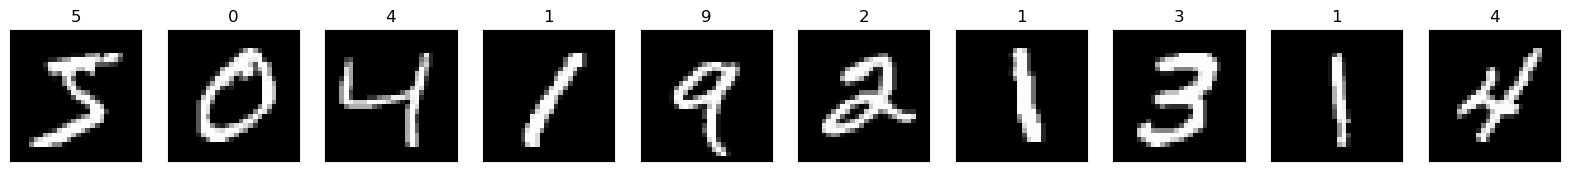

In [5]:
fig,axis=plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
    axis[i].set_title(Y_train[i])
    axis[i].imshow(X_train[i],cmap='gray')
    axis[i].get_xaxis().set_visible(False)
    axis[i].get_yaxis().set_visible(False)
plt.show()

In [6]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [7]:
Y_train.shape

(60000, 10)

In [8]:
#model
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.summary()

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,965 (31.11 KB)

 Trainable params: 7,965 (31.11 KB)

 Non-trainable params: 0 (0.00 B)

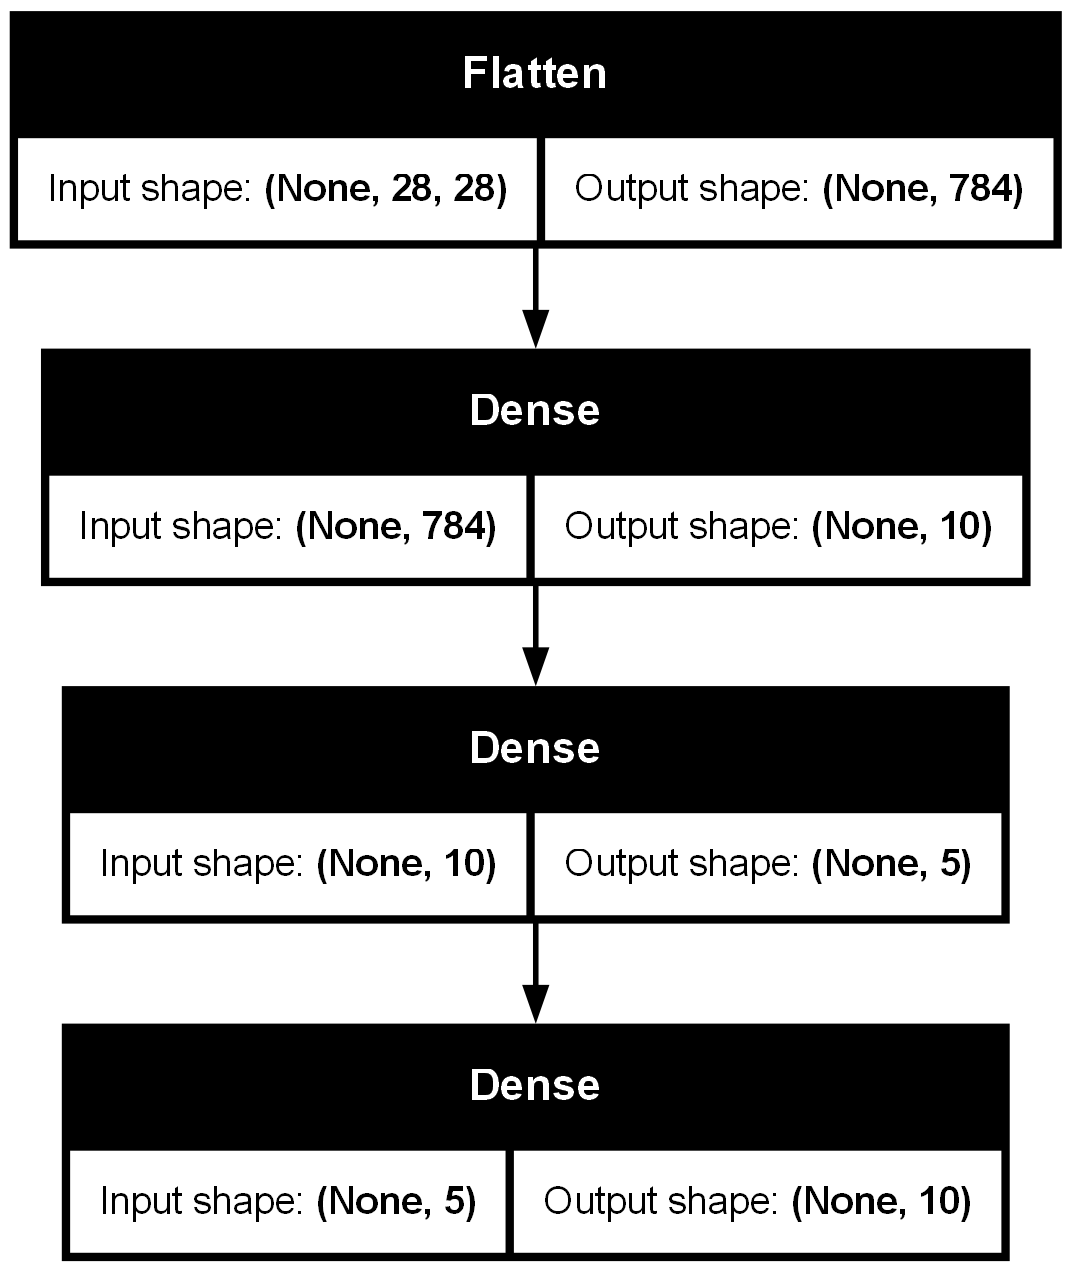

In [9]:
utils.plot_model(model,show_shapes=True)

In [10]:
#model.compile(loss='categorical_crossentropy',
#             optimiser='adam',
 #            metrics=['ace'])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [11]:
model.fit(X_train,Y_train,epochs=50,
         validation_data=(X_test,Y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3121 - loss: 2.0587 - val_accuracy: 0.5325 - val_loss: 1.4620
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5655 - loss: 1.3673 - val_accuracy: 0.6434 - val_loss: 1.1176
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6578 - loss: 1.0636 - val_accuracy: 0.7278 - val_loss: 0.9274
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7277 - loss: 0.9147 - val_accuracy: 0.7578 - val_loss: 0.8463
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7536 - loss: 0.8172 - val_accuracy: 0.7730 - val_loss: 0.7667
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7802 - loss: 0.7596 - val_accuracy: 0.8236 - val_loss: 0.7044
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7853 - loss: 0.7353 - val_accuracy: 0.7869 - val_loss: 0.7378
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7954 - loss: 0.7262 - 

In [25]:
model.save('practice.keras')